# **EDA**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2'

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pingouin as pg


In [5]:
df = pd.read_csv('Data/PROCESSED/movies_ready_for_EDA.csv')

# Visualisations - Hypothesis 1: 
**"Movies that get higher averages votes are likely to be an indicator of success (high revenue)."**

In [6]:
df.head()

,Budget,Genres,Homepage,Id,Keywords,Original_language,Original_title,Overview,Popularity,Production_companies,...,Missing_Status,Runtime_Flag,Has_homepage,Has_overview,Has_tagline,ROI,Log_budget,Log_revenue,Decade,Runtime_bucket
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Complete,Normal,1,1,1,11.763566,19.283571,21.748578,2000.0,epic
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Complete,Normal,1,1,1,3.203333,19.519293,20.683485,2000.0,epic
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Complete,Normal,1,1,1,3.594590,19.316769,20.596199,2010.0,very_long
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Complete,Normal,1,1,1,4.339756,19.336971,20.804790,2010.0,epic
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Complete,Normal,1,1,1,1.092843,19.376192,19.464974,2010.0,very_long


We now are going to focus on finding trends within the dataset and seeing whether certain hypotheses are proven or disproven.

Before we start looking at visualisation using revenue, it is important to filter out those revenues that are 0:

In [7]:
df['Missing_Status'] = np.select(
    [
        (df['Budget'] == 0) & (df['Revenue'] == 0),
        (df['Budget'] == 0),
        (df['Revenue'] == 0)
    ],
    [
        'Both missing',
        'Budget missing',
        'Revenue missing'
    ],
    default='Complete'
)

# Convert to categorical type (optional, for memory efficiency)
df['Missing_Status'] = df['Missing_Status'].astype('category')

# Quick check
df['Missing_Status'].value_counts()

Missing_Status
Complete           3229
Both missing        890
Revenue missing     537
Budget missing      147
Name: count, dtype: int64

In [10]:
df_revenue = df[~df['Missing_Status'].isin(['Revenue missing', 'Both missing'])]


We will now create some visualisations to further understand the data. The first one will be **Vote Average** Vs **Revenue:**

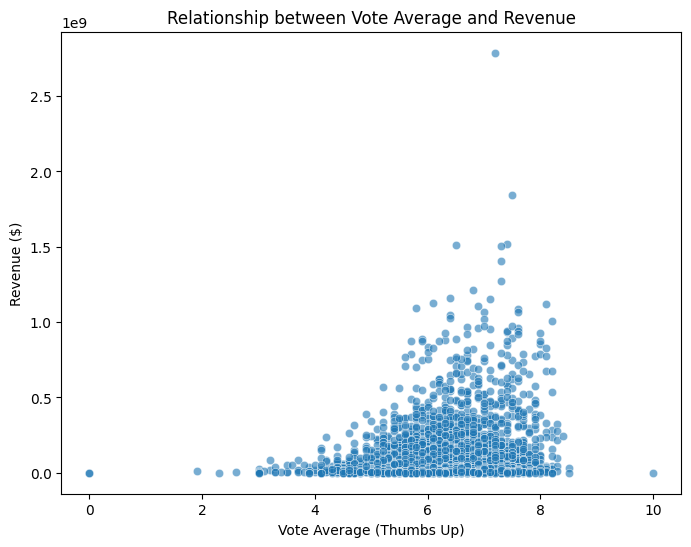

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_revenue, x='Vote_average', y='Revenue', alpha=0.6,)
plt.title('Relationship between Vote Average and Revenue')
plt.xlabel('Vote Average (Thumbs Up)')
plt.ylabel('Revenue ($)')
plt.show()

- In the scatter plot we can see that movies with a vote average above 6 seem to have a higher revenue however there seems to be a second variable that causes higher revenue cpmbined with average votes.
- Overall however, the scatterplot does have a slight positive trend indicating that higher averages do have some impact on revenue.
- The bulk of the data is found between the ranges 5-8 meaning there will be more variance in results and would need further visualisations to understand.

We will split the voting averages into 2 groups to better understand the differences.

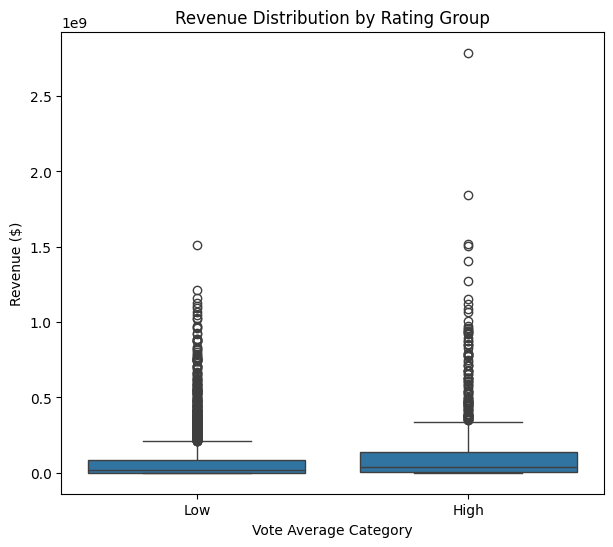

In [36]:
df['Rating_Group'] = pd.cut(df['Vote_average'], bins=[0,7,10], labels=['Low', 'High'])

plt.figure(figsize=(7,6))
sns.boxplot(x='Rating_Group', y='Revenue', data=df)
plt.title('Revenue Distribution by Rating Group')
plt.xlabel('Vote Average Category')
plt.ylabel('Revenue ($)')
plt.show()

- Both "Low" and "High" rating groups have very similar median revenues. This would suggest vote average doesn't have a huge impact on revenue.
- High-rated movies show more and higher revenue outliers. Low-rated movies also have outliers but they are generally less extreme
- Both datasets are heavily right-skewed.
- Overall the boxplot suggests that while high vote averages don't gurantee high revenue for most movies, they do increase the likelhood of higher revenue.

Let's now check how vote averages correlate vs other success metrics:

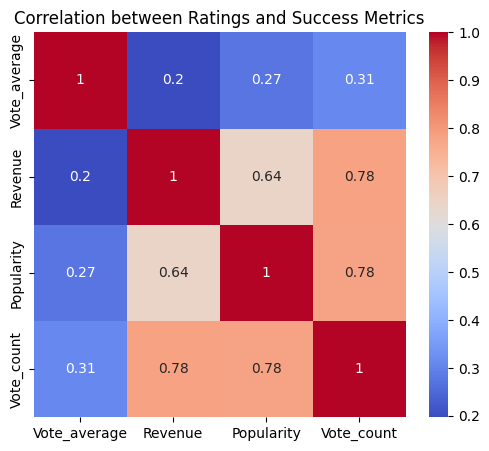

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Vote_average', 'Revenue', 'Popularity', 'Vote_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Ratings and Success Metrics')
plt.show()

- Vote average compared to the other success metrics has weak possitive correlations. This cofirms there is a positive correlation but its not huge. A t-test is required to correctly determine if there is a significance.
- Popularity seems to be the more impactful cause of higher revenue which makes sense due to more people wanting to watch the movie and hence higher revenue.

Finally lets further split the vote averages to see the revenues of each category:

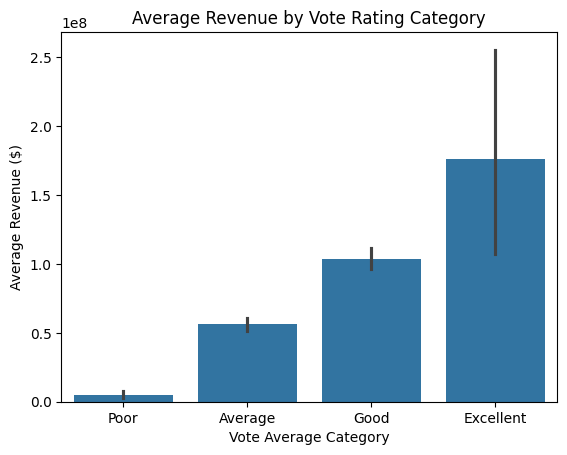

In [14]:
df['Vote_bin'] = pd.cut(df['Vote_average'], bins=[0,4,6,8,10], labels=['Poor','Average','Good','Excellent'])

sns.barplot(data=df, x='Vote_bin', y='Revenue', estimator='mean')
plt.title('Average Revenue by Vote Rating Category')
plt.xlabel('Vote Average Category')
plt.ylabel('Average Revenue ($)')
plt.show()

- In this barplot we can clearly see that there is an upward trend so it does further solidify that higher average votes to make an impact on revenue even if not greatly.
- One thing that can be noted here compared to other graphs is the ratings above 8 being much higher than the previous categories indicating that the best rated movies usually have the best revenue.
- An important thing to note with this graph is that it uses the average therefore it can be skewed by outliers and the excellent category has a significantly lower amount of sample size

## Statistical Testing - Hypothesis 1

Now we will perform a t-test to determine if the difference in revenue between low-rated and high-rated movies is statistically significant. We'll use an independent samples t-test since we're comparing two separate groups.

In [15]:
# Filter out invalid or missing values
filtered_df = df[(df['Vote_average'] > 0) & (df['Revenue'] > 0)].copy()

# Create a categorical variable for rating group
filtered_df['Rating_Group'] = pd.cut(
    filtered_df['Vote_average'],
    bins=[0, 7, 10],
    labels=['Low', 'High']
)

# Check sample sizes
print("Sample sizes:")
print(filtered_df['Rating_Group'].value_counts())
print(f"\nTotal movies with valid data: {len(filtered_df)}")

Sample sizes:
Rating_Group
Low     2705
High     669
Name: count, dtype: int64

Total movies with valid data: 3374


In [16]:
# Perform independent samples t-test
ttest_results = pg.ttest(
    x=filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'],
    y=filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue'],
    correction=False
)

print("T-Test Results:")
print(ttest_results)
print("\n--- Interpretation ---")
print(f"T-statistic: {ttest_results['T'].values[0]:.4f}")
print(f"P-value: {ttest_results['p-val'].values[0]:.6f}")
print(f"Degrees of freedom: {ttest_results['dof'].values[0]:.0f}")
print(f"Cohen's d (effect size): {ttest_results['cohen-d'].values[0]:.4f}")

# Interpret the results
alpha = 0.05
p_value = ttest_results['p-val'].values[0]
if p_value < alpha:
    print(f"\nSIGNIFICANT: p-value ({p_value:.6f}) < {alpha}")
    print("We reject the null hypothesis. There IS a statistically significant difference")
    print("in revenue between low-rated and high-rated movies.")
else:
    print(f"\nNOT SIGNIFICANT: p-value ({p_value:.6f}) >= {alpha}")
    print("We fail to reject the null hypothesis. There is NO statistically significant")
    print("difference in revenue between low-rated and high-rated movies.")

T-Test Results:
               T   dof alternative         p-val                       CI95%  \
T-test  8.130109  3372   two-sided  5.962262e-16  [48422040.66, 79199391.25]   

         cohen-d       BF10  power  
T-test  0.351053  6.461e+12    1.0  

--- Interpretation ---
T-statistic: 8.1301
P-value: 0.000000
Degrees of freedom: 3372
Cohen's d (effect size): 0.3511

SIGNIFICANT: p-value (0.000000) < 0.05
We reject the null hypothesis. There IS a statistically significant difference
in revenue between low-rated and high-rated movies.


After completing the t-test we can see that there is deinitely a significant difference in revenue for movies with higher average votes.

### Additional Statistical Tests

Since revenue data is heavily skewed (as we saw in the boxplot), we should also perform a **Mann-Whitney U test** (non-parametric alternative to t-test) which doesn't assume normal distribution.

In [ ]:
# Mann-Whitney U test (non-parametric alternative)
mw_results = pg.mwu(
    x=filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue'],
    y=filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue'],
    alternative='two-sided'
)

print("Mann-Whitney U Test Results:")
print(mw_results)
print("\n--- Interpretation ---")
print(f"U-statistic: {mw_results['U-val'].values[0]:.0f}")
print(f"P-value: {mw_results['p-val'].values[0]:.6f}")
print(f"Effect size (RBC): {mw_results['RBC'].values[0]:.4f}")

p_value_mw = mw_results['p-val'].values[0]
if p_value_mw < alpha:
    print(f"\n SIGNIFICANT: p-value ({p_value_mw:.6f}) < {alpha}")
    print("The Mann-Whitney U test confirms a significant difference in revenue distributions.")
else:
    print(f"\n NOT SIGNIFICANT: p-value ({p_value_mw:.6f}) >= {alpha}")
    print("The Mann-Whitney U test shows no significant difference in revenue distributions.")

Mann-Whitney U Test Results:
         U-val alternative     p-val       RBC      CLES
MWU  1009110.5   two-sided  0.000004  0.115258  0.557629

--- Interpretation ---
U-statistic: 1009110
P-value: 0.000004
Effect size (RBC): 0.1153

✅ SIGNIFICANT: p-value (0.000004) < 0.05
The Mann-Whitney U test confirms a significant difference in revenue distributions.


### Check Assumptions for T-Test

For the t-test to be valid, we will check if the data meets the assumptions. We will check for normality and variance equality:

In [21]:
high_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'High', 'Revenue']
low_revenue = filtered_df.loc[filtered_df['Rating_Group'] == 'Low', 'Revenue']

sample_size = min(5000, len(high_revenue), len(low_revenue))

print("Normality Test (Shapiro-Wilk):")
print("-" * 50)
if len(high_revenue) > sample_size:
    high_sample = high_revenue.sample(sample_size, random_state=42)
    normality_high = pg.normality(high_sample)
    print(f"High-rated movies (sample of {sample_size}):")
else:
    normality_high = pg.normality(high_revenue)
    print(f"High-rated movies (n={len(high_revenue)}):")
print(normality_high)

if len(low_revenue) > sample_size:
    low_sample = low_revenue.sample(sample_size, random_state=42)
    normality_low = pg.normality(low_sample)
    print(f"\nLow-rated movies (sample of {sample_size}):")
else:
    normality_low = pg.normality(low_revenue)
    print(f"\nLow-rated movies (n={len(low_revenue)}):")
print(normality_low)

Normality Test (Shapiro-Wilk):
--------------------------------------------------
High-rated movies (n=669):
                W          pval  normal
Revenue  0.621641  7.790377e-36   False

Low-rated movies (sample of 669):
                W          pval  normal
Revenue  0.687721  2.431635e-33   False


As the p-value < 0.05, the data is NOT normally distributed. Therefore, given the skewed nature of revenue data, Mann-Whitney U test is more appropriate.

In [24]:
# Levene's test for equality of variances
levene_results = pg.homoscedasticity(
    data=filtered_df,
    dv='Revenue',
    group='Rating_Group',
    method='levene'
)

print("Homogeneity of Variance Test (Levene's):")
print(levene_results)
print("\n If p-value < 0.05, variances are NOT equal.")

Homogeneity of Variance Test (Levene's):
                W          pval  equal_var
levene  66.824971  4.154190e-16      False

 If p-value < 0.05, variances are NOT equal.


In this case we can see that the variances are not equal between the tests so a different test that doesn't care about equal variances.

### Summary of Statistical Tests

We are going to summarize the descriptive statistics for both groups:

In [20]:
# Descriptive statistics by group
print("Descriptive Statistics by Rating Group:")
print("=" * 70)
summary_stats = filtered_df.groupby('Rating_Group')['Revenue'].describe()
print(summary_stats)

print("\n" + "=" * 70)
print("Mean Revenue Comparison:")
print(f"Low-rated movies (0-7):  ${low_revenue.mean():,.2f}")
print(f"High-rated movies (7-10): ${high_revenue.mean():,.2f}")
print(f"Difference: ${high_revenue.mean() - low_revenue.mean():,.2f}")
print(f"Percentage increase: {((high_revenue.mean() - low_revenue.mean()) / low_revenue.mean() * 100):.2f}%")

print("\n" + "=" * 70)
print("Median Revenue Comparison:")
print(f"Low-rated movies (0-7):  ${low_revenue.median():,.2f}")
print(f"High-rated movies (7-10): ${high_revenue.median():,.2f}")
print(f"Difference: ${high_revenue.median() - low_revenue.median():,.2f}")

Descriptive Statistics by Rating Group:
               count          mean           std  min         25%         50%  \
Rating_Group                                                                    
Low           2705.0  1.044483e+08  1.532462e+08  5.0  14899417.0  49469904.0   
High           669.0  1.682590e+08  2.678082e+08  7.0  19000000.0  69959751.0   

                      75%           max  
Rating_Group                             
Low           130431368.0  1.513529e+09  
High          181813770.0  2.787965e+09  

Mean Revenue Comparison:
Low-rated movies (0-7):  $104,448,270.49
High-rated movies (7-10): $168,258,986.44
Difference: $63,810,715.95
Percentage increase: 61.09%

Median Revenue Comparison:
Low-rated movies (0-7):  $49,469,904.00
High-rated movies (7-10): $69,959,751.00
Difference: $20,489,847.00


C:\Users\hamas\AppData\Local\Temp\ipykernel_22492\3059623682.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = filtered_df.groupby('Rating_Group')['Revenue'].describe()


# Visualisations - Hypothesis 4

**"Action movies have a higher likelihood of box office success"**

The first thing we will do, is make a new column that filters movies with "action" within the genre column. The genre column are in JSON-like strings so the first thing we will do is parse it and check if "Action" appears inside and then make a separate column for flagging them:

In [26]:
import ast

# Extract list of genre names from stringified JSON
def extract_genres(x):
    try:
        genres = ast.literal_eval(x)
        if isinstance(genres, list):
            return [g['name'] for g in genres if 'name' in g]
        else:
            return []
    except (ValueError, SyntaxError, TypeError):
        return []

df['Genre_list'] = df['Genres'].apply(extract_genres)

# Create a flag for Action movies

df['Is_Action'] = df['Genre_list'].apply(lambda genres: 'Action' in genres)


df['Is_Action'] = df['Is_Action'].astype('category')


df['Is_Action'].value_counts()


Is_Action
False    3649
True     1154
Name: count, dtype: int64

In [37]:
df_revenue = df_revenue.merge(
    df[['Id', 'Is_Action', 'Genre_list']],  # keep only needed columns
    on='Id',
    how='left'
)

Let's now start off with some visualisation to understand this hypothesis:

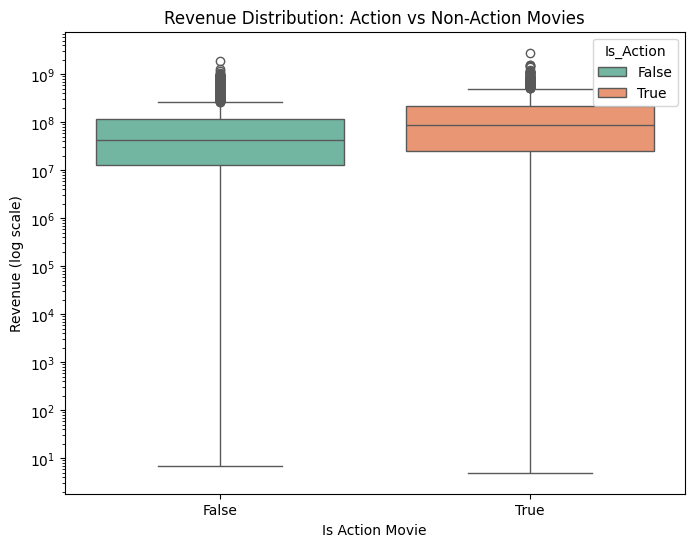

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_revenue, x='Is_Action', y='Revenue', palette='Set2', hue='Is_Action')
plt.yscale('log')  # Revenue often very skewed
plt.title('Revenue Distribution: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Revenue (log scale)')
plt.show()

C:\Users\hamas\AppData\Local\Temp\ipykernel_22492\342964983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_revenue.groupby('Is_Action', as_index=False)['Profit'].mean()


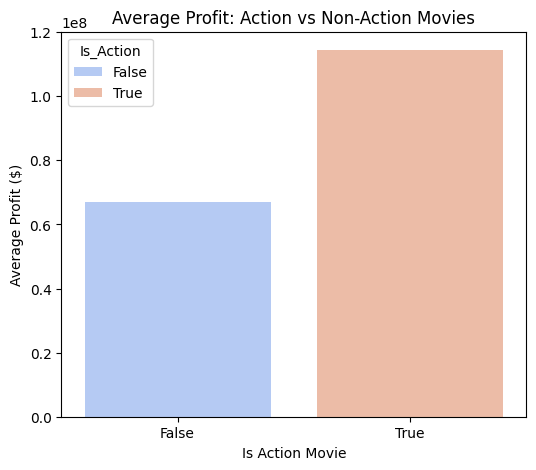

In [39]:
df_grouped = df_revenue.groupby('Is_Action', as_index=False)['Profit'].mean()

plt.figure(figsize=(6,5))
sns.barplot(data=df_grouped, x='Is_Action', y='Profit', palette='coolwarm', hue='Is_Action')
plt.title('Average Profit: Action vs Non-Action Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Average Profit ($)')
plt.show()

C:\Users\hamas\AppData\Local\Temp\ipykernel_22492\1751195899.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate = df.groupby('Is_Action')['Success'].mean().reset_index()


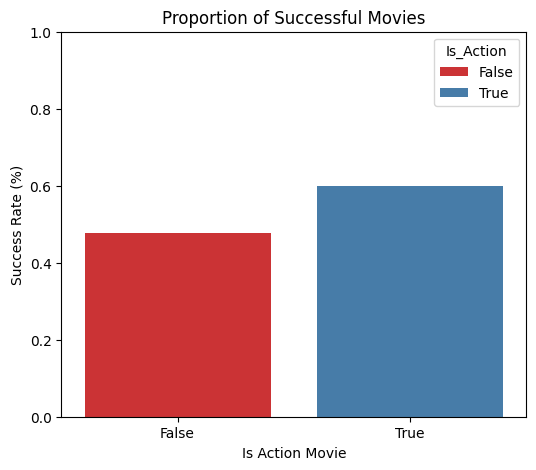

In [32]:
df['Success'] = df['Profit'] > 0

success_rate = df.groupby('Is_Action')['Success'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=success_rate, x='Is_Action', y='Success', palette='Set1', hue='Is_Action')
plt.title('Proportion of Successful Movies')
plt.xlabel('Is Action Movie')
plt.ylabel('Success Rate (%)')
plt.ylim(0,1)
plt.show()

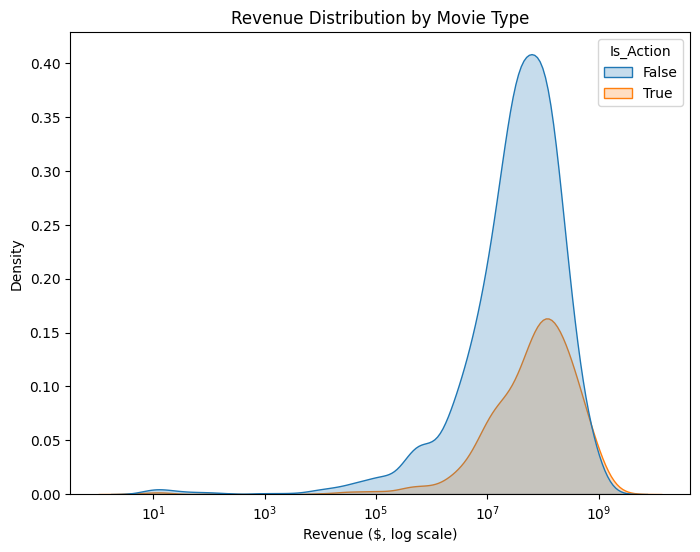

In [40]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_revenue, x='Revenue', hue='Is_Action', log_scale=True, fill=True)
plt.title('Revenue Distribution by Movie Type')
plt.xlabel('Revenue ($, log scale)')
plt.show()

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.